# Homework 8

## Name: Shayari Peiris

### Partner: Veer Kumar
 
### Collaborators:Vishvesh Srinivisan

This homework covers KNN, Decision Trees, and Random Forests. The first question will be a review for training KNN model. The second sequence of questions will give an in depth look at the gini impurity and how training a decision tree actually works. Then the questions will cover basic implimentations of both DT's and RF's along with an intro to tuning hyperparameters. 

In [10]:
#It might be useful to load the ones you know you will use first, and then as you figure out what other ones you need
#come back here and load those ones in as well'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Question 1

(a) Load the diabetes dataset and name it 'df'. Conduct data cleaning.

- Perform any data cleaning or data transformation steps if required
- State some of the data cleaning steps which you can perform on **any** data set

(b) Create two dataframes for features and target variables (Outcome). Conduct a full model training and testing (30%) for a KNN model with K=5. Print the accuracy, confusion matrix, and explain what the confuison matrix tells you

(c) Create a range from 1 to 50 going at steps of 2 then make a list where you will store average accuracy at each k value
use a for loop to compute the average accuracy over 10-fold cross validation for each k value. Plot the average accuracy for each k values and determine which k value you will choose.

In [11]:
#Q1 (a)
# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#Describing the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
#Checking null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
#In the above stats we can see that there are people with 0 BP, 0 skin thickness, and 0 Glucose, which aren't feasible so we must treat them as NaN values.
df["Glucose"] = df["Glucose"].apply(lambda x: np.nan if x == 0 else x)
df["BloodPressure"] = df["BloodPressure"].apply(lambda x: np.nan if x == 0 else x)
df["SkinThickness"] = df["SkinThickness"].apply(lambda x: np.nan if x == 0 else x)
df["Insulin"] = df["Insulin"].apply(lambda x: np.nan if x == 0 else x)
df["BMI"] = df["BMI"].apply(lambda x: np.nan if x == 0 else x)

In [15]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
#see that the Insulin column has nearly 50% of NaN values. Therefore, it would be appropriate to drop the column completely
df.isnull().sum()/len(df)*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [17]:
df.drop(columns=["Insulin"], inplace=True)


In [18]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [19]:
#For highly skewed values we'll impute the column with median else mean.
# Highly skewed
df["BMI"].replace(to_replace=np.nan,value=df["BMI"].median(), inplace=True)
df["Pregnancies"].replace(to_replace=np.nan,value=df["Pregnancies"].median(), inplace=True)

# Normal
df["Glucose"].replace(to_replace=np.nan,value=df["Glucose"].mean(), inplace=True)
df["BloodPressure"].replace(to_replace=np.nan,value=df["BloodPressure"].mean(), inplace=True)
df["SkinThickness"].replace(to_replace=np.nan,value=df["SkinThickness"].mean(), inplace=True)

In [20]:
## To clean the data and check for null values, you can recode variables and drop variables with alot of missing data and replace null values with means.

In [21]:
#Q1 (b)
X = df.drop(['Outcome'], axis=1)
y= df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [22]:
#Building a basic KNN model with K = 5

# First learning model (k = 5)
classifier = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [23]:
#Accuracy of our model

accuracy = accuracy_score(y_test, y_pred)*100

print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal to 74.46%


In [24]:
#Confusion Matrix for variables with 2 labels

Conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)

[[126  24]
 [ 35  46]]


In [25]:
#Q1 (c)
# creating a list of K for KNN
#The model will consider K values from 1 till 50 with an interval of 2 (All odd numbers from 1 till 30)
k_list = list(range(1,50,2))

# Creating list of Average Accuracy for each Cross-validation
cv_scores = []

# Performing 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

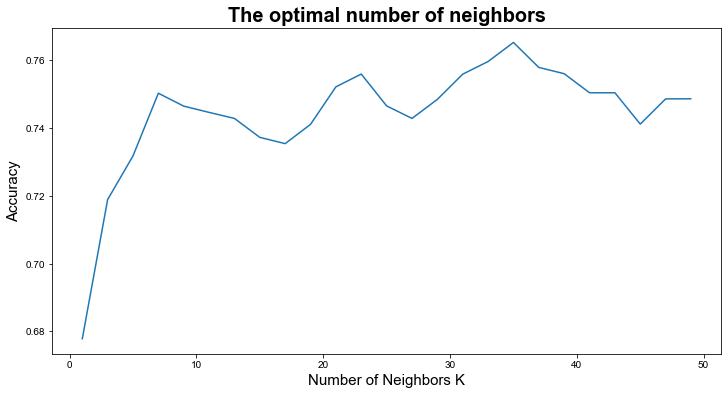

In [26]:
# Plotting average Accuracy for all number of neighbors

plt.figure()
plt.figure(figsize=(12,6))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()

In [27]:
## Based on the plot I would choose K=36, because it's got highest accuracy for model.

# Question 2

The goal of Q2 is to make a function that can calculate the weighted gini impurity over any grouping and any size of classes. (Note: There will be lab notes explaining the gini impurity and how to calculate it)

(a) Calculate the gini impurity of the example by hand. Then write some code to do it for you. You will have to find $p_0$ and $p_1$ which are the probabilities of selecting a 0 and a 1 (respectively) from the group.

(b) Now say we have two groups? Calculate the gini index of each group (with some code). Now, make a weighted sum of the gini numbers, each weighted by the proportion of the group size to the total number of entries (i.e. if group 1 is of length 10 and group 2 is of length 15, then group 1 would have a weight of 2/5 and group 2 a weight of 3/5).

(c) Generalize that bit of code you wrote to now deal with any number of groups with any number of classes. Assume the groups will be given as a list of lists, and if there is an empty group the gini number will be 0 (there needs to be an if statement to make sure we do not divide by 0).

(d) Make that bit of code into a function called gini_imp which takes a 'groups' variable and a 'classes' variable. It should return the gini index. Note, you need to use the classes variable because that is how you know what classes to check for in each group. Test it on the same example from part (c)

In [28]:
#Q2 (a)

###This is the example
classes = [0,1]
group = [0,0,0,1,1,0,1,0,0]

p0=group.count(0)/len(group)
p1=group.count(1)/len(group)
gini_impurity=1-p0**2-p1**2
print('gini impurity:',gini_impurity)

gini impurity: 0.4444444444444445


In [29]:
#Q2 (b)
classes = [0,1]
groups = [[0,0,0,1],[0,0,1,1]]
g0_p0=groups[0].count(0)/len(groups[0])
g0_p1=groups[0].count(1)/len(groups[0])
g0_gini=1-g0_p0**2-g0_p1**2
print('gini index for group 0:',g0_gini)
g1_p0=groups[1].count(0)/len(groups[1])
g1_p1=groups[0].count(1)/len(groups[1])
g1_gini=1-g1_p0**2-g1_p1**2
print('gini index for group :1',g1_gini)
weigthed_gini=0.5*g0_gini+0.5*g1_gini
print('weighted gini index:',weighted_gini)

gini index for group 0: 0.375
gini index for group :1 0.6875
weighted gini index: 0.5684210526315789


In [30]:
#Q2 (c)
###test your bit of code with:
classes = [0,1,2,3]
groups = [[0,3,1,1,1],[0,0,0,1],[2,3,1,1],[],[0,0,1,1,2,2]]

ginis=[]
for group in groups:
    if len(group)==0:
        ginis.append(0)
    else:
        gini=0
        for c in classes:
            gini+=(group.count(c)/len(group))**2
        gini=1-gini
        ginis.append(gini)
print('ginis:',ginis)
weighted_gini=0
total_length=sum([len(group) for group in groups])
for i in range(len(groups)):
    weighted_gini+=len(groups[i])/total_length*ginis[i]
print('weighted gini:',weighted_gini)
###You should get a gini number equal to 0.5684

ginis: [0.5599999999999999, 0.375, 0.625, 0, 0.6666666666666667]
weighted gini: 0.5684210526315789


In [31]:
#Q2 (d)
classes = [0,1,2,3]
groups = [[0,3,1,1,1],[0,0,0,1],[2,3,1,1],[],[0,0,1,1,2,2]]
def gini_imp(groups,classes):
    ginis=[]
    for group in groups:
        if len(group)==0:
            ginis.append(0)
        else:
            gini=0
            for c in classes:
                gini+=(group.count(c)/len(group))**2
            gini=1-gini
            ginis.append(gini)
    weighted_gini=0
    total_length=sum([len(group) for group in groups])
    for i in range(len(groups)):
        weighted_gini+=len(groups[i])/total_length*ginis[i]
    return weighted_gini

gini_imp(groups,classes)

0.5684210526315789

# Question 3

To make a full decision trees

(a) Load the datasets titanic_train_data and titanic_test_data into dataframes and split them into X_train, X_test, y_train and y_test (the training sets are coming from the titanic train data and visa versa). Note, the first two columns should be deleted because they are just passenger Id's, also documentation about the data can be found here:https://www.kaggle.com/azeembootwala/titanic. Create a Decision Tree instance, fit the data on the training sets and get the accuracy score on the test set. Report the confusion matrix.

(b) Split the X_train and y_train data into sets called X_train,X_val, y_train, y_val using train_test_split. We are going to try and tune some parameters in the Decision tree. Called a new Decision Tree instance with the following parameters: **max_features, max_depth, and min_samples_leaf**. Choose some value to test them with, and run the model a few times to see if you can get different accuracy scores (use the X_val and y_val to get the accuracy scores). What do these parameters do? (Look them up in the documentation)

(c) We are going to use the validation sets to try and find the best parameter combinations. So, use a triple for loop to iterate over different ranges for each of the three parameters, find what combination gives the best accuracy on the validation set. Then, use that combination on a decision tree to classify the test set.

In [50]:
#Q3 (a)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix)
#Loading dataset

titanic_train_data= pd.read_csv('titanic_train_data.csv')
titanic_test_data=pd.read_csv('titanic_test_data.csv')
titanic_train_data.drop(columns=titanic_train_data.columns[[0,1]], axis=1, inplace=True)
titanic_test_data.drop(columns=titanic_test_data.columns[[0,1]], axis=1, inplace=True)
X_train=titanic_train_data.drop(['Survived'],axis=1)
X_test=titanic_test_data.drop(['Survived'],axis=1)
y_test=titanic_test_data[['Survived']]
y_train=titanic_train_data[['Survived']]



In [51]:
#Fitting Decision Tree model using DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
#Creating a function to print evaluation metrics

def print_score(clf, X_train, y_train, X_test, y_test, train=True, pos_label="Yes"):
    if train == False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [53]:
#Evaluating decision tree model
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8

Classification Report: 
 	Precision: 0.7
	Recall Score: 0.7777777777777778
	F1 score: 0.7368421052631577

Confusion Matrix: 
 [[52 12]
 [ 8 28]]



In [54]:
#Q3b
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
tree_clf=DecisionTreeClassifier(max_depth = 1,min_samples_leaf = 2, max_features = 2,random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_features=2, min_samples_leaf=2,
                       random_state=42)

In [55]:
#max_depth:The maximum depth for growing each tree: an integer between 1 and 100, inclusive.
#minimum_samples_leaf:The minimum number of samples each branch must have after splitting a node
#max_features:The number of features to consider when looking for the best split

In [56]:
#Evaluating decision tree model
print_score(tree_clf, X_train, y_train, X_val, y_val, train=False)

Test Result:

accuracy score: 0.6233766233766234

Classification Report: 
 	Precision: 0.4673913043478261
	Recall Score: 0.5308641975308642
	F1 score: 0.4971098265895954

Confusion Matrix: 
 [[101  49]
 [ 38  43]]



In [57]:
#Q3 (c)
params = {"max_depth":(list(range(1, 20))), 
    "max_features":(list(range(1, 20))), 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

Fitting 3 folds for each of 6859 candidates, totalling 20577 fits
Best paramters: {'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 15})


C:\Users\veer2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12996 fits failed out of a total of 20577.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12996 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\veer2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\veer2\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\veer2\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must 

DecisionTreeClassifier(max_depth=4, max_features=3, min_samples_leaf=15)

In [58]:

tree_clf=DecisionTreeClassifier(max_depth=4, max_features=3, min_samples_leaf=15,random_state=42)
tree_clf.fit(X_train, y_train)
#Evaluating decision tree model
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7272727272727273

Classification Report: 
 	Precision: 0.625
	Recall Score: 0.5555555555555556
	F1 score: 0.5882352941176471

Confusion Matrix: 
 [[123  27]
 [ 36  45]]



# Question 4

Let's move onto random forests, we'll be doing more parameter tuning here.

(a) With the original train and test sets, run a Random Forest model on the data and report the accuracy score. How does it compare to the scores in Question 3?

(b) Create the train and validation sets again, and create a Random Forest Classifier with the following parameters: **n_estimators, max_leaf_nodes, max_depth**, with some values. What do this parameters do? (Again look up the documentation) Run the model and see how the accuracy changes. Change the values and try to get a higher accuracy.

(c) Similar to Question 3 part (c), use a triple for loop to iterate over combinations of parameter values for the random forest and find one that is optimal in accuracy. How does this accuracy compare to the others we have seen?

Note: This kind of parameter opimization can be done using built in python functions, GridSearchCV and RandomSearchCV both are methods that take in some kind of range / distribution for the parameters and finds the best one (and uses cross validation which is a bonus).

In [ ]:
#Q4 (a)
from sklearn.ensemble import RandomForestClassifier
#Fitting the random forest model using RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

In [ ]:
#In Q3a we got accuracy=0.8 and in Q4a we get a slightly better accuracy of 0.83.

In [ ]:
#Evaluating random forest model using the previously created function

print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
#Q4 (b)
rf_clf = RandomForestClassifier(n_estimators=3, max_leaf_nodes=2, max_depth=3)
rf_clf.fit(X_train, y_train)

In [ ]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
# the accuracy in Q3b is 0.62 and it in Q4b it is 0.63, so accuracy improves slightly.
#n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions.
#max_depth:The number of splits that each decision tree is allowed to make. If the number of splits is too low, the model underfits the data and if it is too high the model overfits. Generally, we go with a max depth of 3, 5, or 7
#max_leaf_nodes:Maximum number of leaf nodes a decision tree can have.

In [ ]:
#Q4 (c)
params = {"n_estimators":(list(range(1, 10))), 
    "max_features":(list(range(1, 10))), 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = RandomForestClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = RandomForestClassifier(**best_params)
tree_clf.fit(X_train, y_train)

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
#As compared to Q3c where we have obtained an accuracy of 0.72, the accuracy for Q4c is 0.87 which has slightly improved.

# Bonus

Come up with an analogy for decision tree's v. random forest's and why random forests avoid the problem of overfitting. (+5)